## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import pandas as pd
import json
import matplotlib.pyplot as plt

## Load synthesis files

In [6]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/2024_10_14_highlights_replicates/2024_10_14_highlights_replicates_sampletable.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_04_OptimizationRound1/SampleTable_2024_11_04_OptimizationRound1.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_11_OptimizationRound2/SampleTable_2024_11_11_OptimizationRound2.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_14_OptimRound3/SampleTable_2024_11_14_OptimizationRound3.csv'] 

In [7]:
synth_tables = []

for fp in synthesis_files:
    data= pd.read_csv(fp)
    synth_tables.append(data)

synth_table = pd.concat(synth_tables, axis = 0)

In [8]:
for table, synth_file in zip(synth_tables, synthesis_files):
    for val in table['uuid'].to_list():
        if 'd298bae0-5f86-4a29-b399-111644195748' == val:
            print(synth_file)

/home/bgpelkie/Code/silica-np-synthesis/2024_11_11_OptimizationRound2/SampleTable_2024_11_11_OptimizationRound2.csv


In [9]:
table

,Unnamed: 0,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,ethanol_dilute_vol,sample_dilute_vol,well,dilute_well
0,0,97eb1065-a266-4bf0-8d3d-70c6c45e135d,17.000000,59.886661,177.900108,1445.213231,2.232143,2.691584,0.003296,0.0,1700.0,A1,C7
1,1,e7968010-0689-42a7-8797-2a3e9b7ae66c,128.723552,59.976938,253.625649,1257.673861,0.294790,20.380603,0.024399,1199.0,501.0,A2,C8
2,2,fd6bad8e-aedb-430a-a5bd-e667c317cbb5,17.000000,8.500000,243.605258,1430.894743,2.232143,2.691584,0.003277,0.0,1700.0,A3,D1
3,3,9d522d04-006c-4226-847e-27f987ea389d,217.168911,125.968067,120.627048,1236.235975,0.174732,34.384022,0.041389,1403.0,297.0,A4,D2
4,4,9f62f2c7-89e5-4122-8d6c-f876026d5975,72.110605,81.826747,74.426442,1471.636206,0.526225,11.417162,0.014097,805.0,895.0,A5,D3
5,5,46a44e80-dbc4-4e33-906e-dcfc99b242f2,248.195589,102.837770,211.959846,1137.006795,0.152889,39.296428,0.046609,1440.0,260.0,A6,D4
6,6,23754685-93a7-40a9-aefd-34d561daf1a9,149.006813,65.518953,22.988700,1462.485534,0.254662,23.592021,0.029162,1267.0,433.0,A7,D5
7,7,c8a04429-83dd-4779-a587-8e58a018413f,225.206037,8.500000,199.486357,1266.807606,0.168496,35.656527,0.042781,1414.0,286.0,A8,D6
8,8,326de561-5b2e-46d0-a192-b9bff6174040,17.000000,186.999999,102.630764,1393.369238,2.232143,2.691584,0.003300,0.0,1700.0,B1,D7
9,9,ee49095a-c041-4633-b695-6863ffcee3fa,81.911343,138.443228,146.033549,1333.611880,0.463262,12.968898,0.015754,912.0,788.0,B3,D8


In [10]:
synth_table = synth_table.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
synth_table = synth_table.drop(['well'], axis = 1)

In [11]:
synth_table = synth_table.set_index('uuid')

## Get volume fractions

In [12]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [13]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [14]:
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [15]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,,,
4fd21940-a331-4524-b730-cf76de1b4d8d,50.00000,124.000000,165.000000,1361.000000,0.362682,7.951422,0.009674,NaN,NaN,NaN,1700.0,0.029412,0.072941,0.097059,0.800588
8933d4b1-8929-4b58-a491-a0c55df30fed,83.00000,58.000000,175.000000,1384.000000,0.218193,13.216927,0.016085,NaN,NaN,NaN,1700.0,0.048824,0.034118,0.102941,0.814118
130093e4-2947-4d37-b73a-ed4c23442ab8,20.00000,64.000000,49.000000,1567.000000,0.903794,3.190814,0.003982,NaN,NaN,NaN,1700.0,0.011765,0.037647,0.028824,0.921765
a3f7d49b-cc77-4468-aae0-ad451027ddc0,181.00000,9.000000,228.000000,1283.000000,0.100743,28.625618,0.034357,NaN,NaN,NaN,1701.0,0.106408,0.005291,0.134039,0.754262
f69628da-ff56-4f3a-ba2e-816036b87557,100.00000,52.000000,15.000000,1534.000000,0.182971,15.761151,0.019630,NaN,NaN,NaN,1701.0,0.058789,0.030570,0.008818,0.901822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7f042b90-a311-4af9-bb43-69e8c874b62c,17.00000,49.949998,92.868942,1540.181060,2.232143,2.691584,0.003342,0.0,1700.0,E8,1700.0,0.010000,0.029382,0.054629,0.905989
a53538a9-2e62-41df-ab0b-de034c8bd0aa,17.00000,21.387521,165.744269,1495.868210,2.232143,2.691584,0.003313,0.0,1700.0,F1,1700.0,0.010000,0.012581,0.097497,0.879922
1a084599-bbe6-4de7-89ef-9791617c5e9f,17.00000,26.973989,130.216619,1525.809392,2.232143,2.691584,0.003329,0.0,1700.0,F2,1700.0,0.010000,0.015867,0.076598,0.897535


In [16]:
synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [17]:
distance_results = pd.read_csv('../2024_11_14_OptimRound3/amplitude_phase_results_afterOptimRound3_11_16_24.csv')

In [18]:
distance_results = distance_results.set_index('uuid')

In [19]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,processes_status
uuid,,,,,
770a433d-0480-4cee-bf12-ce066c24db55,0,1.079610,0.407451,1.487061,success
fed3ab35-04e9-4916-8527-8627191a3bdc,1,0.474113,0.177540,0.651653,success
4ab46dcc-3395-4e7b-bb87-52e805e12abb,2,0.979413,0.540022,1.519435,success
23850c30-c572-41ad-abf0-7e1bd4fa7397,3,1.176489,0.445089,1.621578,success
96ef6012-d812-4975-8b77-8ed7e78669fb,4,1.003274,0.520217,1.523491,success
...,...,...,...,...,...
fd6bad8e-aedb-430a-a5bd-e667c317cbb5,175,1.715798,0.575287,2.291085,success
4cc6ca70-fd71-4099-a5dc-4f04f5a0558e,176,1.032662,0.516989,1.549651,success
9d522d04-006c-4226-847e-27f987ea389d,177,0.770329,0.492434,1.262763,success


In [20]:
distance_list = []
experiment_status = []

for uuid_val in synth_table.index:
    #print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        experiment_status.append('complete')
        


In [21]:
synth_table['ap_distance'] = distance_list
synth_table['experiment_status'] = experiment_status

In [22]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
4fd21940-a331-4524-b730-cf76de1b4d8d,50.00000,124.000000,165.000000,1361.000000,0.362682,7.951422,0.009674,NaN,NaN,NaN,1700.0,0.029412,0.072941,0.097059,0.800588,NaN,incomplete
8933d4b1-8929-4b58-a491-a0c55df30fed,83.00000,58.000000,175.000000,1384.000000,0.218193,13.216927,0.016085,NaN,NaN,NaN,1700.0,0.048824,0.034118,0.102941,0.814118,NaN,incomplete
130093e4-2947-4d37-b73a-ed4c23442ab8,20.00000,64.000000,49.000000,1567.000000,0.903794,3.190814,0.003982,NaN,NaN,NaN,1700.0,0.011765,0.037647,0.028824,0.921765,0.904308,complete
a3f7d49b-cc77-4468-aae0-ad451027ddc0,181.00000,9.000000,228.000000,1283.000000,0.100743,28.625618,0.034357,NaN,NaN,NaN,1701.0,0.106408,0.005291,0.134039,0.754262,1.467659,complete
f69628da-ff56-4f3a-ba2e-816036b87557,100.00000,52.000000,15.000000,1534.000000,0.182971,15.761151,0.019630,NaN,NaN,NaN,1701.0,0.058789,0.030570,0.008818,0.901822,1.498439,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7f042b90-a311-4af9-bb43-69e8c874b62c,17.00000,49.949998,92.868942,1540.181060,2.232143,2.691584,0.003342,0.0,1700.0,E8,1700.0,0.010000,0.029382,0.054629,0.905989,0.894470,complete
a53538a9-2e62-41df-ab0b-de034c8bd0aa,17.00000,21.387521,165.744269,1495.868210,2.232143,2.691584,0.003313,0.0,1700.0,F1,1700.0,0.010000,0.012581,0.097497,0.879922,0.907345,complete
1a084599-bbe6-4de7-89ef-9791617c5e9f,17.00000,26.973989,130.216619,1525.809392,2.232143,2.691584,0.003329,0.0,1700.0,F2,1700.0,0.010000,0.015867,0.076598,0.897535,0.953726,complete


In [27]:
synth_table.to_csv('synth_table_ap_distance_11_16_24.csv')

In [24]:
synth_table['rank'] = rank = synth_table['ap_distance'].rank()

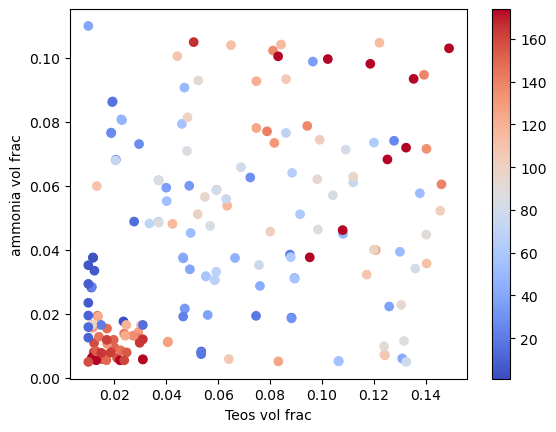

In [25]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['ammonia_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
cbar = fig.colorbar(sc, ax = ax)

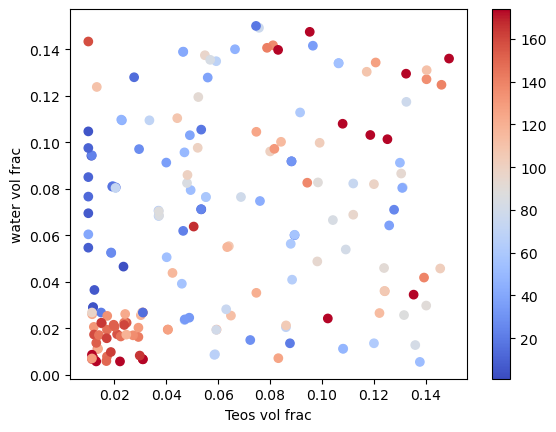

In [26]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['water_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('water vol frac')
cbar = fig.colorbar(sc, ax = ax)